In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
#import numba

t0 = time.time()
tmid1 = t0
particles = 1
part_tot = 20000
size = 1001 #size of the grid, must be odd for a center
x0 = int((size - 1) / 2)
e_radius = 15 #edge radius
d_radius = 35 # death radius
tree = np.zeros([size, size]) # n X n array means array center is [(n-1)/2,(n-1)/2] when n is odd
tree[x0, x0] = 1
spawn_overlap = 0
sticky = 0.5 #Chance that the particle sitcks to the aggregate

def Spawn():
    rand1 = random.randrange(36000) / 100
    angle = rand1 * np.pi / 180
    if 90 > rand1 >= 0:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 180 > rand1 >= 90:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    if 270 > rand1 >= 180:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 360 > rand1 >= 270:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    return round(x), round(y)


i=0

spawn = 0
while particles < part_tot:
    x, y = Spawn()
    spawn += 1
    if tree[x, y] != 1:
    #if tree[x, y] == 1:
        #spawn_overlap += 1
        #print("*** SPAWN OVERLAP ***")
        #if spawn_overlap > 5000:
            #break
    #else:
        while i < 1:
            if np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > d_radius: # Checking if particle is in death zone
                #tree[x,y] = 0
                break
                
            elif (tree[x + 1, y] + tree[x - 1, y] + tree[x, y + 1] + tree[x, y - 1] + tree[x + 1, y + 1]  #Long statement checking if particle is near aggregate
                   + tree[x + 1, y - 1] + tree[x - 1, y + 1] + tree[x - 1, y - 1] > 0):
                rand2 = random.randrange(1,101) / 100
                if rand2 < sticky: #Allows to stick
                    tree[x, y] = 1
                    particles += 1
                    if (particles / 1000) == int(particles / 1000):
                        tmid2 = time.time()
                        print("N =", particles, "| Time since last checkpoint:", round(tmid2 - tmid1, 2), "| Time since start:", round(tmid2 - t0, 2))
                        tmid1 = tmid2
                """else: #Move that accounts for the possiblility of moving inside the aggregate
                    while i < 1:
                        randx = random.randrange(-1,2)
                        randy = random.randrange(-1,2)
                        if tree[x + randx, y + randy] == 0:
                            x += randx
                            y += randy
                            break"""
                    
                if d_radius > np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > e_radius and d_radius < x0: #Radius updater for every movement
                    e_radius += 1
                    d_radius += 1
                
                break
                
            else: #Moves particle
                randx = random.randrange(-1,2)
                randy = random.randrange(-1,2)
                x += randx
                y += randy
                
t1 = time.time()
hours = int((t1 - t0) / 3600)
minutes = int(((t1 - t0) / 3600 - hours) * 60)
seconds = int(((((t1 - t0) / 3600 - hours) * 60) - minutes) * 60)
print("*** TIME ELAPSED :", hours, "HOURS,", minutes, "MINUTES, AND", seconds, "SECONDS ***")
print("*** TOTAL PARTICLES =", particles, " ***")
plt.matshow(tree)

N = 1000 | Time since last checkpoint: 8.32 | Time since start: 8.32
N = 2000 | Time since last checkpoint: 23.68 | Time since start: 32.0
N = 3000 | Time since last checkpoint: 34.64 | Time since start: 66.65
N = 4000 | Time since last checkpoint: 49.99 | Time since start: 116.63
N = 5000 | Time since last checkpoint: 73.54 | Time since start: 190.17
N = 6000 | Time since last checkpoint: 90.04 | Time since start: 280.2
N = 7000 | Time since last checkpoint: 109.04 | Time since start: 389.25
N = 8000 | Time since last checkpoint: 135.56 | Time since start: 524.81
N = 9000 | Time since last checkpoint: 184.66 | Time since start: 709.47


KeyboardInterrupt: 

9672
1.587510389835519


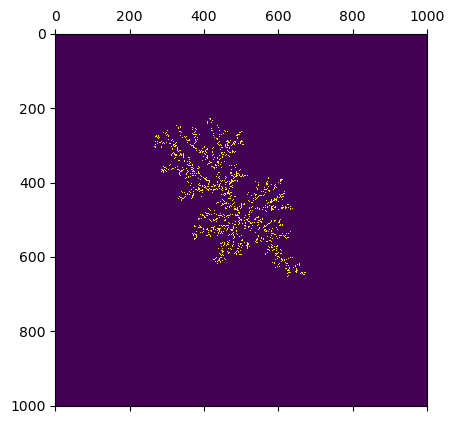

In [15]:
print(particles)
print(spawn)
plt.matshow(tree)
print(np.log(particles) / np.log(e_radius))
#plt.matshow(tree[225:535, 0:535])

In [25]:
print(spawn)
#print(spawn_overlap)

30525
